In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Base

* Indicadores de municípios brasileiros em diversos períodos

In [2]:
df = pd.read_csv('municipios.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head(5)

,id_municipio,ano,expectativa_vida,fecundidade_total,mortalidade_1,mortalidade_5,razao_dependencia,prob_sobrevivencia_40,prob_sobrevivencia_60,taxa_envelhecimento,expectativa_anos_estudo,taxa_analfabetismo_11_a_14,taxa_analfabetismo_15_a_17,taxa_analfabetismo_15_mais,taxa_analfabetismo_18_a_24,taxa_analfabetismo_18_mais,taxa_analfabetismo_25_a_29,taxa_analfabetismo_25_mais,taxa_atraso_0_basico,taxa_atraso_0_fundamental,taxa_atraso_0_medio,taxa_atraso_1_basico,taxa_atraso_1_fundamental,taxa_atraso_1_medio,taxa_atraso_2_basico,taxa_atraso_2_fundamental,taxa_atraso_2_medio,taxa_freq_bruta_basico,taxa_freq_bruta_fundamental,taxa_freq_bruta_medio,taxa_freq_bruta_pre,taxa_freq_bruta_superior,taxa_freq_liquida_basico,taxa_freq_liquida_fundamental,taxa_freq_liquida_medio,taxa_freq_liquida_pre,taxa_freq_liquida_superior,taxa_freq_0_3,taxa_freq_11_14,taxa_freq_15_17,taxa_freq_18_24,taxa_freq_25_29,taxa_freq_4_5,taxa_freq_4_6,taxa_freq_5_6,taxa_freq_6,taxa_freq_6_14,taxa_freq_6_17,taxa_freq_fundamental_15_17,taxa_freq_fundamental_18_24,taxa_freq_fundamental_4_5,taxa_freq_medio_18_24,taxa_freq_medio_6_14,taxa_freq_superior_15_17,taxa_fundamental_11_13,taxa_fundamental_12_14,taxa_fundamental_15_17,taxa_fundamental_16_18,taxa_fundamental_18_24,taxa_fundamental_18_mais,taxa_fundamental_25_mais,taxa_medio_18_20,taxa_medio_18_24,taxa_medio_18_mais,taxa_medio_19_21,taxa_medio_25_mais,taxa_superior_25_mais,renda_pc_max_quintil_1,renda_pc_max_quintil_2,renda_pc_max_quintil_3,renda_pc_max_quintil_4,renda_pc_max_decil_9,indice_gini,prop_pobreza_extrema,prop_pobreza_extrema_criancas,prop_pobreza,prop_pobreza_criancas,prop_vulner_pobreza,prop_vulner_pobreza_criancas,prop_renda_10_ricos,prop_renda_20_pobres,prop_renda_20_ricos,prop_renda_40_pobres,prop_renda_60_pobres,prop_renda_80_pobres,prop_renda_trabalho,razao_10_ricos_40_pobres,razao_20_ricos_40_pobres,renda_pc,renda_pc_quintil_1,renda_pc_decil_10,renda_pc_quintil_2,renda_pc_quintil_3,renda_pc_quintil_4,renda_pc_quintil_5,renda_pc_exc_renda_nula,renda_pc_pobreza_extrema,renda_pc_pobreza,renda_pc_vulner_pobreza,indice_theil,prop_trabalhadores_conta_proria,prop_empregadores,prop_ocupados_agropecuaria,prop_ocupados_comercio,prop_ocupados_construcao,prop_ocupados_extracao,prop_ocupados_formalizacao,prop_ocupados_fundamental,prop_ocupados_medio,prop_ocupados_servicos,prop_ocupados_siup,prop_ocupados_superior,prop_ocupados_transformacao,prop_ocupados_renda_0,prop_ocupados_renda_1_sm,prop_ocupados_renda_2_sm,prop_ocupados_renda_3_sm,prop_ocupados_renda_5_sm,renda_media_ocupados,taxa_atividade,taxa_atividade_10_14,taxa_atividade_15_17,taxa_atividade_18_24,taxa_atividade_18_mais,taxa_atividade_25_29,taxa_desocupacao,taxa_desocupacao_10_14,taxa_desocupacao_15_17,taxa_desocupacao_18_24,taxa_desocupacao_18_mais,taxa_desocupacao_25_29,indice_treil_trabalho,taxa_ocupados_carteira,taxa_ocupados_setor_publico,taxa_ocupados_sem_carteira,taxa_agua_encanada,taxa_banheiro_agua_encanada,taxa_densidade_2_mais,taxa_coleta_lixo,taxa_energia_eletrica,taxa_agua_esgoto_inadequados,taxa_paredes_inadequados,taxa_criancas_dom_sem_fund,taxa_criancas_fora_escola_4_5,taxa_criancas_fora_escola_6_14,taxa_dom_sem_fund,taxa_dom_vulner_sem_fund,taxa_sem_fund_informal,taxa_mulheres_com_filho_10_14,taxa_mulheres_com_filho_15_17,taxa_mulheres_chefe_filho_15m,taxa_nest_ntrab_vulner_15_24,taxa_vulner_desloc_1_hora,taxa_dom_vulner_dep_idoso,taxa_sem_energia_eletrica,populacao_homens_0_4,populacao_homens_10_14,populacao_homens_15_19,populacao_homens_20_24,populacao_homens_25_29,populacao_homens_30_34,populacao_homens_35_39,populacao_homens_40_44,populacao_homens_45_49,populacao_homens_50_54,populacao_homens_55_59,populacao_homens_5_9,populacao_homens_60_64,populacao_homens_65_69,populacao_homens_70_74,populacao_homens_75_79,populacao_homens,populacao_homens_80_mais,populacao_mulheres_0_4,populacao_mulheres_10_14,populacao_mulheres_15_19,populacao_mulheres_20_24,populacao_mulheres_25_29,populacao_mulheres_30_34,populacao_mulheres_35_39,popul

* Selecionando indicadores do ano de 2010

In [4]:
df = df[df['ano']==2010]

* Transformando a variável fecundidade_total em categorica

In [5]:
df['fecundidade_total'].isna().sum() #inicialmente verificando se há algum nulo

0

In [6]:
df['class_fecundidade_total'] = pd.qcut(df['fecundidade_total'],4) #criando 04 categorias, com base nos quantis

In [7]:
df['class_fecundidade_total'].value_counts()

(1.209, 1.85]    1433
(2.13, 2.46]     1412
(2.46, 4.89]     1363
(1.85, 2.13]     1357
Name: class_fecundidade_total, dtype: int64

* Selecionando a variável de expectativa de vida como variável dependente
* Selecionando a) expectativa_anos_estudo; b) indice_gini; c) prop_trabalhadores_conta_propria; d) indice_frequencia_escolar e e) fecundidade total (categorica) como variáveis independentes

In [8]:
df = df[['expectativa_vida','expectativa_anos_estudo','indice_gini', 'prop_trabalhadores_conta_proria','indice_frequencia_escolar','class_fecundidade_total']]
df_dep = df[['expectativa_vida']]
df_indep = df[['expectativa_anos_estudo','indice_gini', 'prop_trabalhadores_conta_proria','indice_frequencia_escolar','class_fecundidade_total']]

### Análises Iniciais

* Calculando a correlação de pearson entre as variáveis quanti, indica correlação linear entre as variáveis

In [9]:
df.corr(method = 'pearson')

,expectativa_vida,expectativa_anos_estudo,indice_gini,prop_trabalhadores_conta_proria,indice_frequencia_escolar
expectativa_vida,1.000000,0.440502,-0.379577,0.027054,0.640819
expectativa_anos_estudo,0.440502,1.000000,-0.395585,0.051224,0.785163
indice_gini,-0.379577,-0.395585,1.000000,0.024256,-0.529805
prop_trabalhadores_conta_proria,0.027054,0.051224,0.024256,1.000000,0.018951
indice_frequencia_escolar,0.640819,0.785163,-0.529805,0.018951,1.000000


* Calculando a correlação de spearman entre as variáveis quanti, indica correlação monotônica entre as variáveis

In [10]:
df.corr(method = 'spearman')

,expectativa_vida,expectativa_anos_estudo,indice_gini,prop_trabalhadores_conta_proria,indice_frequencia_escolar
expectativa_vida,1.000000,0.468071,-0.406924,-0.024963,0.673751
expectativa_anos_estudo,0.468071,1.000000,-0.366153,0.005804,0.767891
indice_gini,-0.406924,-0.366153,1.000000,0.117791,-0.517690
prop_trabalhadores_conta_proria,-0.024963,0.005804,0.117791,1.000000,-0.029598
indice_frequencia_escolar,0.673751,0.767891,-0.517690,-0.029598,1.000000


* Verificando o comportamento da expectativa de vida conforme as categorias de fecundidade total

<AxesSubplot:xlabel='class_fecundidade_total', ylabel='expectativa_vida'>

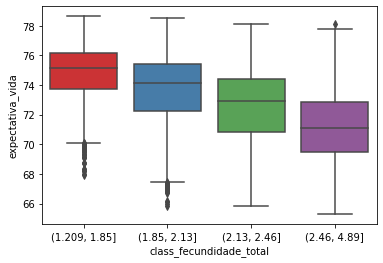

In [11]:
sns.boxplot(x="class_fecundidade_total", y="expectativa_vida", data=df, palette="Set1")

### Modelo inicial de regressão

* Transformando a variavel categorica em dummy

In [12]:
df_indep['class_fecundidade_total'].value_counts()

(1.209, 1.85]    1433
(2.13, 2.46]     1412
(2.46, 4.89]     1363
(1.85, 2.13]     1357
Name: class_fecundidade_total, dtype: int64

In [13]:
df_indep = pd.get_dummies(df_indep, prefix = 'Classe Fecundidade', prefix_sep = "_", columns = ['class_fecundidade_total'])

In [14]:
df_indep.head()

,expectativa_anos_estudo,indice_gini,prop_trabalhadores_conta_proria,indice_frequencia_escolar,"Classe Fecundidade_(1.209, 1.85]","Classe Fecundidade_(1.85, 2.13]","Classe Fecundidade_(2.13, 2.46]","Classe Fecundidade_(2.46, 4.89]"
2,8.67,0.58,34.73,0.629,0,0,1,0
5,9.18,0.53,27.66,0.648,0,1,0,0
8,10.09,0.51,32.98,0.700,0,0,1,0
11,9.74,0.57,24.97,0.698,0,1,0,0
14,10.22,0.50,28.46,0.712,0,1,0,0


* Modelo com todas as variáveis

In [15]:
df_indep = sm.add_constant(df_indep)

In [16]:
model = sm.OLS(df_dep, df_indep).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       expectativa_vida   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     663.2
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:34:20   Log-Likelihood:                -11694.
No. Observations:                5565   AIC:                         2.340e+04
Df Residuals:                    5557   BIC:                         2.346e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               51.9877      0.337    154.469      0.000      51.328      52.648
expectativa_anos_estudo             -0.3212      0.039     -8.161      0.000      -0.398      -0.244
indice_gini                         -0.6975      0.482     -1.447      0.148      -1.643       0.248
prop_trabalhadores_conta_proria      0.0030      0.003      1.102      0.270      -0.002       0.008
indice_frequencia_escolar           17.0683      0.523     32.658      0.000      16.044      18.093
Classe Fecundidade_(1.209, 1.85]    13.7875      0.104    132.338      0.000      13.583      13.992
Classe Fecundidade_(1.85, 2.13]     13.2411      0.098    135.633      0.000      13.050      13.432
Classe Fecundidade_(2.13, 2.46]     12.7667      0.094    136.272      0.000      12.583      12.950
Classe Fecundidade_(2.46, 4.89]     12.1924      0.096    127.385      0.000      12.005      12.380
==============================================================================
Omnibus:                       37.366   Durbin-Watson:                   1.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.945
Skew:                          -0.199   Prob(JB):                     5.76e-09
Kurtosis:                       3.075   Cond. No.                     2.79e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.61e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Verificando os pressupostos

* Normalidade dos Resíduos

In [18]:
previsao = model.predict()

In [19]:
residuos = previsao - df_dep['expectativa_vida']

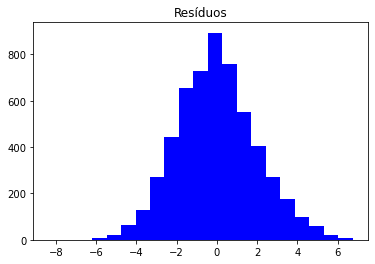

In [20]:
# Pelo histograma, a principio, os resíduos parecem seguir uma distribuicao normal
plt.hist(residuos, color='blue', bins=21)
plt.title('Resíduos')
plt.show()

In [21]:
# Como o p-valor é > 0.05, não rejeita-se a hipótese nula, assim, os resíduos tem distribuicao normal
from scipy import stats
statistic ,pvalue = stats.shapiro(residuos)
print(statistic)
print(pvalue)

0.9968830943107605
2.214972871783516e-09


C:\Users\gcabr\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


* Multicolinearidade

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
# Funcao que calcula o VIF (Variance Inflation Factor) de cada variável
# VIF mensura o quanto da variância do coeficiente da variável é incrementado pela presença de correlação com as demais
def vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [24]:
df_indep = df[['expectativa_anos_estudo','indice_gini', 'prop_trabalhadores_conta_proria','indice_frequencia_escolar','class_fecundidade_total']]
df_indep = pd.get_dummies(df_indep, prefix = 'Classe Fecundidade', prefix_sep = "_", columns = ['class_fecundidade_total'])

In [25]:
#VIF acima de 10 unidades é considerado problemático, indicando a presença de multicolinearidade
vif(df_indep.iloc[:,:-1])

,variables,VIF
0,expectativa_anos_estudo,184.285069
1,indice_gini,28.655081
2,prop_trabalhadores_conta_proria,7.366521
3,indice_frequencia_escolar,158.531156
4,"Classe Fecundidade_(1.209, 1.85]",3.060501
5,"Classe Fecundidade_(1.85, 2.13]",2.494798
6,"Classe Fecundidade_(2.13, 2.46]",2.266789


* Heterocedasticidade

In [26]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [27]:
# Aplica-se o teste Breusch-Pagan, que testa H0 que não há heterocedasticidade
# Como p-valor < 0.05, rejeita-se H0, assim, há heterocedasticidade
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

In [28]:
lzip(names, test)

[('Lagrange multiplier statistic', 192.79297216411007),
 ('p-value', 2.1045289281244785e-37),
 ('f-value', 28.489236779616657),
 ('f p-value', 7.998861970075331e-39)]

### Seleção das Variáveis Regressora - Método Backward

* Cria-se um modelo com todas as variáveis
* Remove-se a variável com maior p-valor, desde que seja maior que 0,05
* Repete-se o processo até que todas as variáveis tenham p-valor < 0,05

In [29]:
df_indep = df[['expectativa_anos_estudo','indice_gini', 'prop_trabalhadores_conta_proria','indice_frequencia_escolar','class_fecundidade_total']]
df_indep = pd.get_dummies(df_indep, prefix = 'Classe Fecundidade', prefix_sep = "_", columns = ['class_fecundidade_total'])

In [30]:
df_indep = sm.add_constant(df_indep)
model = sm.OLS(df_dep, df_indep).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       expectativa_vida   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     663.2
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:34:23   Log-Likelihood:                -11694.
No. Observations:                5565   AIC:                         2.340e+04
Df Residuals:                    5557   BIC:                         2.346e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               51.9877      0.337    154.469      0.000      51.328      52.648
expectativa_anos_estudo             -0.3212      0.039     -8.161      0.000      -0.398      -0.244
indice_gini                         -0.6975      0.482     -1.447      0.148      -1.643       0.248
prop_trabalhadores_conta_proria      0.0030      0.003      1.102      0.270      -0.002       0.008
indice_frequencia_escolar           17.0683      0.523     32.658      0.000      16.044      18.093
Classe Fecundidade_(1.209, 1.85]    13.7875      0.104    132.338      0.000      13.583      13.992
Classe Fecundidade_(1.85, 2.13]     13.2411      0.098    135.633      0.000      13.050      13.432
Classe Fecundidade_(2.13, 2.46]     12.7667      0.094    136.272      0.000      12.583      12.950
Classe Fecundidade_(2.46, 4.89]     12.1924      0.096    127.385      0.000      12.005      12.380
==============================================================================
Omnibus:                       37.366   Durbin-Watson:                   1.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.945
Skew:                          -0.199   Prob(JB):                     5.76e-09
Kurtosis:                       3.075   Cond. No.                     2.79e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.61e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [31]:
del df_indep['prop_trabalhadores_conta_proria']

In [32]:
model = sm.OLS(df_dep, df_indep).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       expectativa_vida   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     773.5
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:34:24   Log-Likelihood:                -11694.
No. Observations:                5565   AIC:                         2.340e+04
Df Residuals:                    5558   BIC:                         2.345e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               52.0289      0.334    155.550      0.000      51.373      52.685
expectativa_anos_estudo             -0.3184      0.039     -8.107      0.000      -0.395      -0.241
indice_gini                         -0.6765      0.482     -1.404      0.160      -1.621       0.268
indice_frequencia_escolar           17.0466      0.522     32.639      0.000      16.023      18.070
Classe Fecundidade_(1.209, 1.85]    13.8041      0.103    133.897      0.000      13.602      14.006
Classe Fecundidade_(1.85, 2.13]     13.2489      0.097    136.072      0.000      13.058      13.440
Classe Fecundidade_(2.13, 2.46]     12.7724      0.094    136.531      0.000      12.589      12.956
Classe Fecundidade_(2.46, 4.89]     12.2035      0.095    128.218      0.000      12.017      12.390
==============================================================================
Omnibus:                       37.599   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.190
Skew:                          -0.199   Prob(JB):                     5.09e-09
Kurtosis:                       3.079   Cond. No.                     8.63e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.92e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
del df_indep['indice_gini']

In [34]:
model = sm.OLS(df_dep, df_indep).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       expectativa_vida   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     927.7
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:34:24   Log-Likelihood:                -11695.
No. Observations:                5565   AIC:                         2.340e+04
Df Residuals:                    5559   BIC:                         2.344e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               51.6576      0.205    252.147      0.000      51.256      52.059
expectativa_anos_estudo             -0.3197      0.039     -8.140      0.000      -0.397      -0.243
indice_frequencia_escolar           17.2582      0.500     34.509      0.000      16.278      18.239
Classe Fecundidade_(1.209, 1.85]    13.7193      0.084    164.214      0.000      13.556      13.883
Classe Fecundidade_(1.85, 2.13]     13.1602      0.074    177.543      0.000      13.015      13.306
Classe Fecundidade_(2.13, 2.46]     12.6809      0.067    188.848      0.000      12.549      12.813
Classe Fecundidade_(2.46, 4.89]     12.0972      0.058    209.740      0.000      11.984      12.210
==============================================================================
Omnibus:                       37.933   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.547
Skew:                          -0.199   Prob(JB):                     4.26e-09
Kurtosis:                       3.086   Cond. No.                     1.70e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.79e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##### Verificando os pressupostos

In [35]:
# Remove-se a variável com maior VIF, sendo que há valores maiores que 10
vif(df_indep.iloc[:,1:])

,variables,VIF
0,expectativa_anos_estudo,2.639831
1,indice_frequencia_escolar,3.279286
2,"Classe Fecundidade_(1.209, 1.85]",28.136444
3,"Classe Fecundidade_(1.85, 2.13]",24.586162
4,"Classe Fecundidade_(2.13, 2.46]",23.967254
5,"Classe Fecundidade_(2.46, 4.89]",20.006811


In [36]:
del df_indep['Classe Fecundidade_(1.209, 1.85]']

In [37]:
vif(df_indep.iloc[:,1:])

,variables,VIF
0,expectativa_anos_estudo,162.489539
1,indice_frequencia_escolar,149.749152
2,"Classe Fecundidade_(1.85, 2.13]",1.861226
3,"Classe Fecundidade_(2.13, 2.46]",1.923712
4,"Classe Fecundidade_(2.46, 4.89]",1.965252


In [38]:
del df_indep['expectativa_anos_estudo']

In [39]:
vif(df_indep.iloc[:,1:])

,variables,VIF
0,indice_frequencia_escolar,3.138777
1,"Classe Fecundidade_(1.85, 2.13]",1.805281
2,"Classe Fecundidade_(2.13, 2.46]",1.752287
3,"Classe Fecundidade_(2.46, 4.89]",1.581208


In [40]:
# Ajusta-se o modelo com as variáveis em que não identificou-se multicolinearidade
model = sm.OLS(df_dep, df_indep).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       expectativa_vida   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     1130.
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:34:25   Log-Likelihood:                -11728.
No. Observations:                5565   AIC:                         2.347e+04
Df Residuals:                    5560   BIC:                         2.350e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              64.4129      0.252    255.207      0.000      63.918      64.908
indice_frequencia_escolar          14.2291      0.336     42.342      0.000      13.570      14.888
Classe Fecundidade_(1.85, 2.13]    -0.5789      0.077     -7.543      0.000      -0.729      -0.428
Classe Fecundidade_(2.13, 2.46]    -1.0946      0.079    -13.823      0.000      -1.250      -0.939
Classe Fecundidade_(2.46, 4.89]    -1.6943      0.090    -18.785      0.000      -1.871      -1.517
==============================================================================
Omnibus:                       39.304   Durbin-Watson:                   1.274
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.954
Skew:                          -0.204   Prob(JB):                     2.11e-09
Kurtosis:                       3.074   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Verifica-se a normalidade dos resíduos do modelo ajustado
from scipy import stats
statistic ,pvalue = stats.shapiro(model.resid)
print(statistic)
print(pvalue)
# Como p-valor > 0.05, não rejeita-se H0, assim, os resíduos possuem distribuição norma

0.9968291521072388
1.6853557438523126e-09


C:\Users\gcabr\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [42]:
# Verificando heterocedasticidade
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

In [43]:
lzip(names, test)

[('Lagrange multiplier statistic', 210.46201416127758),
 ('p-value', 2.1135162846056252e-44),
 ('f-value', 54.6344428703036),
 ('f p-value', 3.019023005306766e-45)]

### Análise de Resíduos

* Verifica-se, inicialmente, a relação entre os valores preditos e os resíduos do modelo 

In [44]:
previsao = model.predict()
residuos = previsao - df_dep['expectativa_vida']

* Um modelo bem ajustado tem os resíduos dispersos aleatoriamente em torno do zero

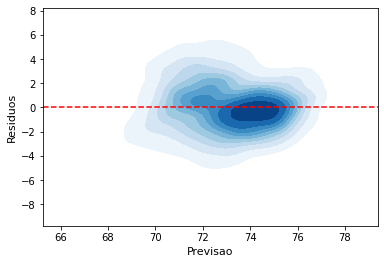

In [45]:
sns.kdeplot(x = previsao, y = residuos, cmap="Blues", shade=True)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Previsao', fontsize=11)
plt.ylabel('Residuos', fontsize=11)
plt.show()

* Verifica-se a relação das variáveis explicativas e os resíduos do modelo
 * Um modelo bem ajustado terá os resíduos aleatoriamente distribuidos em torno de 0, sem tendência aparente

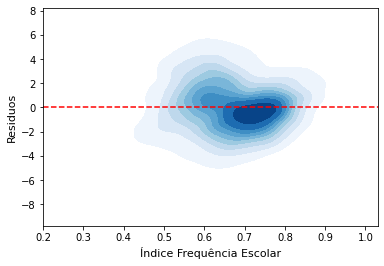

In [46]:
sns.kdeplot(x = df_indep['indice_frequencia_escolar'], y = residuos, cmap="Blues", shade=True)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Índice Frequência Escolar', fontsize=11)
plt.ylabel('Residuos', fontsize=11)
plt.show()

* Testa-se os resíduos em confronto com as variáveis categóricas presentes no modelo
    * A princípio, os resíduos parecem estar distribuidos igualmente entre as categorias

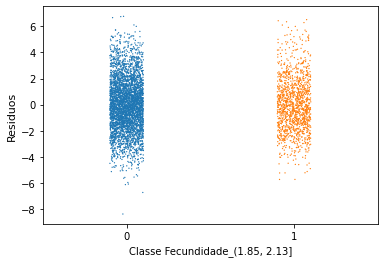

In [47]:
sns.stripplot(x = df_indep['Classe Fecundidade_(1.85, 2.13]'], y = residuos, jitter=0.1, size=1.3)
plt.ylabel('Residuos', fontsize=11)
plt.show()

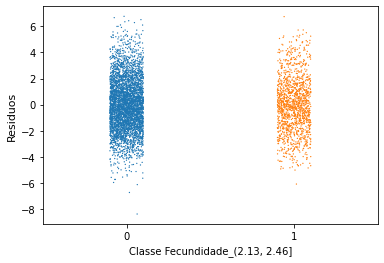

In [48]:
sns.stripplot(x = df_indep['Classe Fecundidade_(2.13, 2.46]'], y = residuos, jitter=0.1, size=1.3)
plt.ylabel('Residuos', fontsize=11)
plt.show()

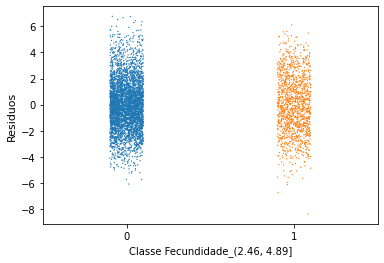

In [49]:
sns.stripplot(x = df_indep['Classe Fecundidade_(2.46, 4.89]'], y = residuos, jitter=0.1, size=1.3)
plt.ylabel('Residuos', fontsize=11)
plt.show()

* Verifica-se, por fim, se há alguma observação outlier que esta influenciando o modelo
    * Emprega-se a distância de cook p/ essa verificação
        * Recomenda-se observar variáveis com distância maior que 0.5

In [50]:
influence = model.get_influence()
cooks = influence.cooks_distance

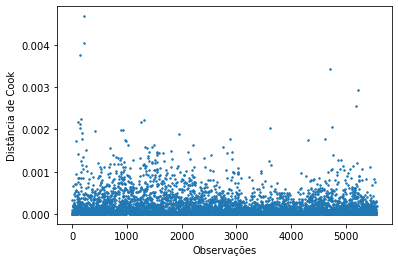

In [51]:
plt.plot((df_indep.reset_index()).index, cooks[0], linestyle = 'none' ,marker='o',markersize=1.5)
plt.xlabel('Observações')
plt.ylabel('Distância de Cook')
plt.show()